# Метод на опорните вектори

In [3]:
import time
import re
from __future__ import print_function
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, MinMaxScaler, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [5]:
from sklearn.datasets import make_classification


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_svc_log_decision_function(clf1, clf2, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    P2 = clf2.decision_function(XY)
    P2 = P2.reshape(XX.shape)
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    
    ax.contour(XX, YY, P2, colors='r', label='logreg',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    

def lin_sep_svm_demo(class_sep=2):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)

    # създайте SVC и LogisticRegression обекти с C=100 и обучете съответните модели
    # използвайките plot_svc_log_decision_function изобразете разделителните линии в двата модела
    # опитайте да получите фигура подобна на тази по-долу


In [6]:
lin_sep_svm_demo(2)

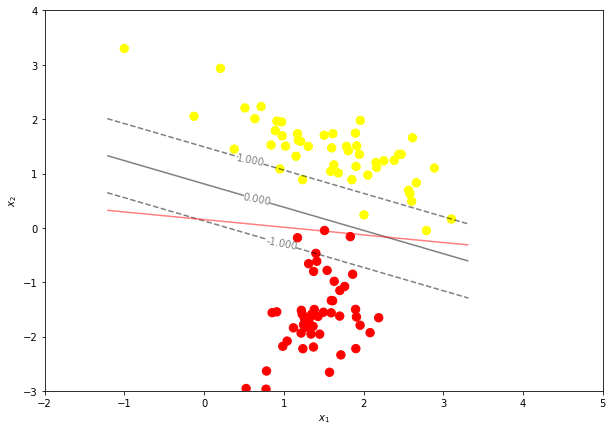

### Линейно неразделим случай 


In [7]:
def lin_sep_svm_demo_C(class_sep=2, C=10):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)

    # Намерете подходящи стойности на C за да опишете линейно неразделимите данни създадени със функцията make_classification
    # Опитайте да получите фигура подобна на тази по-долу


In [9]:
lin_sep_svm_demo_C(class_sep=1.5, C=0.5)

# Нелинейни ядра 

In [20]:
from sklearn.datasets import make_classification, make_circles
import matplotlib.pyplot as plt


def demo_nonlin_data():
   # Generate data
    X, y = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=0)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    r = X[:, 0] ** 2 + X[:, 1] ** 2
    
    ax = fig.add_subplot(1, 2, 2)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=70, cmap='autumn')
    ax.view_init(elev=30, azim=30)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_1^2 + x_2^2$')

In [21]:

from mpl_toolkits import mplot3d

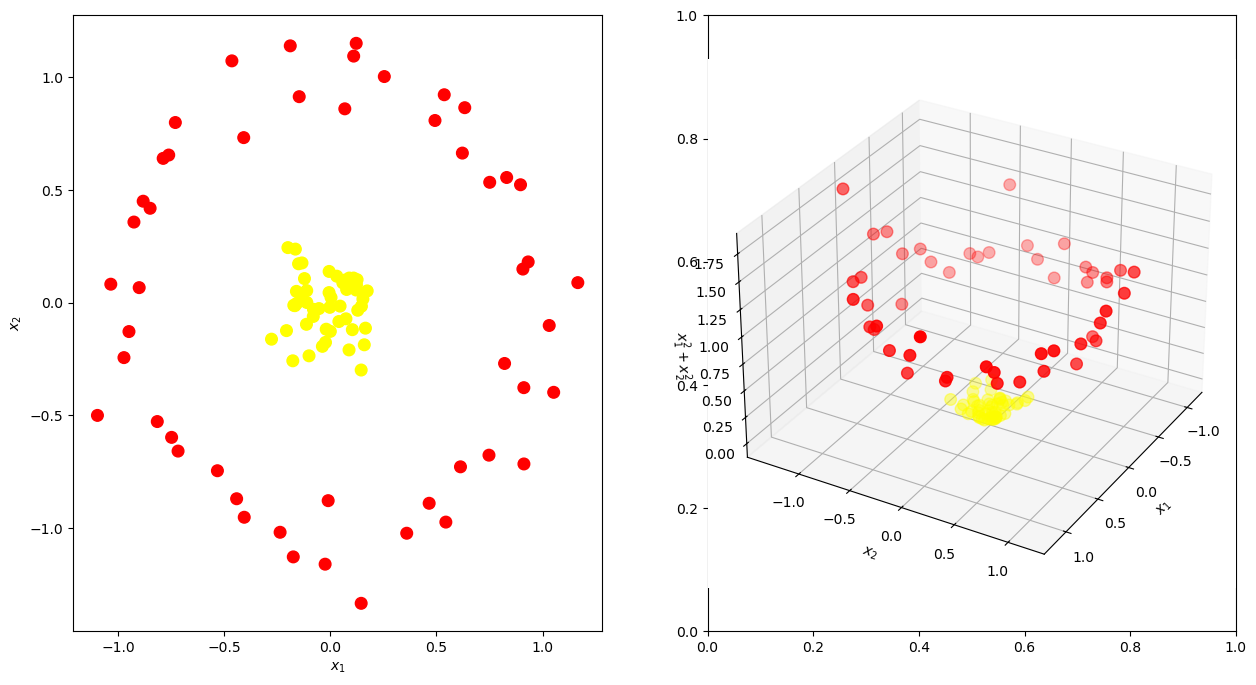

In [22]:
demo_nonlin_data() 

In [23]:
def lin_sep_svm_demo_kernel_C(class_sep=2, kernel='linear', C = 1, gamma=1.2, degree=2, coef0=0.0):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)

    # Създайте SVC обект с ядро, което има стойност kernel (от функцията по-горе)
    # използвайте и параметрите gamma, degree и coef0 (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    #lin_svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=0.0).fit(X, y)
    
    # чрез plot_svc_decision_function опитайте да получите фигурата по-долу


In [25]:
lin_sep_svm_demo_kernel_C(kernel=['rbf', 'linear', 'poly'][2])